In [161]:
import pandas as pd

In [163]:
df = pd.read_csv("~/Downloads/equaldex_equality_index.csv")

In [165]:
df.head()

,Rank,Region ID,Name,EI,EI Legal,EI PO
0,IS,Iceland,94,98,90.0,1
1,NO,Norway,87,87,87.0,2
2,ES,Spain,83,100,67.0,3
3,UY,Uruguay,83,93,73.0,4
4,CL,Chile,81,100,62.0,5


In [167]:
df.dtypes

Rank          object
Region ID     object
Name           int64
EI             int64
EI Legal     float64
EI PO          int64
dtype: object

In [169]:
# Data Exploring and Data Manipulaiton

In [171]:
#!pip install pycountry-convert

In [173]:
import pycountry_convert as pc

def get_continent(alpha2):
    try:
        alpha2 = alpha2.strip().upper()
        continent_code = pc.country_alpha2_to_continent_code(alpha2)
        return pc.convert_continent_code_to_continent_name(continent_code)
    except:
        return "Unknown"

df['Continent'] = df['Rank'].apply(get_continent)


In [175]:
df.loc[df['Rank'] == 'RU', 'Continent'] = 'Asia'

In [177]:
def categorize_ei(ei):
    if ei >= 80:
        return 'High'
    elif 50 <= ei < 80:
        return 'Medium'
    else:
        return 'Low'

df['EI Category'] = df['EI'].apply(categorize_ei)


In [179]:
continent_avg_ei = df.groupby('Continent')['EI'].mean()
print(continent_avg_ei)

Continent
Africa           25.283019
Asia             33.326531
Europe           74.767442
North America    50.217391
Oceania          44.285714
South America    73.916667
Unknown          43.666667
Name: EI, dtype: float64


In [181]:
continent_ei_counts = df.groupby(['Continent', 'EI Category']).size().unstack(fill_value=0)

# Display the table
print(continent_ei_counts)

EI Category    High  Low  Medium
Continent                       
Africa            1   46       6
Asia              1   37      11
Europe           20    1      22
North America     5   16       2
Oceania           2    9       3
South America     7    3       2
Unknown           0    3       0


In [183]:
df.head()

,Rank,Region ID,Name,EI,EI Legal,EI PO,Continent,EI Category
0,IS,Iceland,94,98,90.0,1,Europe,High
1,NO,Norway,87,87,87.0,2,Europe,High
2,ES,Spain,83,100,67.0,3,Europe,High
3,UY,Uruguay,83,93,73.0,4,South America,High
4,CL,Chile,81,100,62.0,5,South America,High


In [185]:
df.describe(include="all")

,Rank,Region ID,Name,EI,EI Legal,EI PO,Continent,EI Category
count,196,197,197.000000,197.000000,175.000000,197.000000,197,197
unique,196,197,NaN,NaN,NaN,NaN,7,3
top,IS,Iceland,NaN,NaN,NaN,NaN,Africa,Low
freq,1,1,NaN,NaN,NaN,NaN,53,115
mean,NaN,NaN,39.812183,45.588832,34.862857,99.000000,NaN,NaN
std,NaN,NaN,23.235490,28.406102,21.110915,57.013156,NaN,NaN
min,NaN,NaN,1.000000,0.000000,2.000000,1.000000,NaN,NaN
25%,NaN,NaN,20.000000,22.000000,16.000000,50.000000,NaN,NaN
50%,NaN,NaN,37.000000,46.000000,33.000000,99.000000,NaN,NaN
75%,NaN,NaN,57.000000,63.000000,53.000000,148.000000,NaN,NaN


In [187]:
import plotly.express as px
#!pip  install pycountry
import pycountry

# Sample data setup (replace this with your actual dataframe)
# dataframe = pd.read_csv("your_path_here.csv")  # if you're importing

# Step 1: Convert ISO-2 to ISO-3 using pycountry
def iso2_to_iso3(iso2):
    try:
        return pycountry.countries.get(alpha_2=iso2).alpha_3
    except:
        return None

# Step 2: Create a new column with ISO-3 codes
df['ISO3'] = df['Rank'].apply(iso2_to_iso3)

# OPTIONAL: Print any failed matches
print("Missing codes:\n", df[df['ISO3'].isnull()]['Rank'])


Missing codes:
 76     XK
83    NaN
Name: Rank, dtype: object


In [190]:
# Create subsets by continent
df_africa = df[df["Continent"] == "Africa"]
df_asia = df[df["Continent"] == "Asia"]
df_europe = df[df["Continent"] == "Europe"]
df_north_america = df[df["Continent"] == "North America"]
df_south_america = df[df["Continent"] == "South America"]
df_oceania = df[df["Continent"] == "Oceania"]

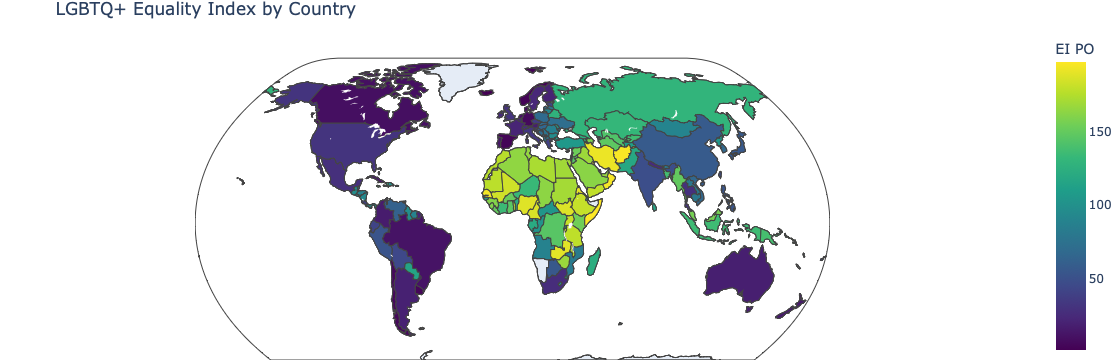

In [ ]:
import plotly.express as px

fig = px.choropleth(
    df,
    locations="ISO3",        # This should be ISO Alpha-2 codes
    locationmode="ISO-3",
    color="EI PO",                   # Color by Equality Index
    hover_name="Region ID",            # Show country name on hover
    color_continuous_scale="Viridis",
    projection="natural earth",
    title="LGBTQ+ Equality Index by Country"
)

fig.update_geos(showcountries=True, showcoastlines=True, 
showland=True, fitbounds="locations")
fig.update_layout(margin={"r":0,"t":30,"l":0,"b":0})

fig.show()

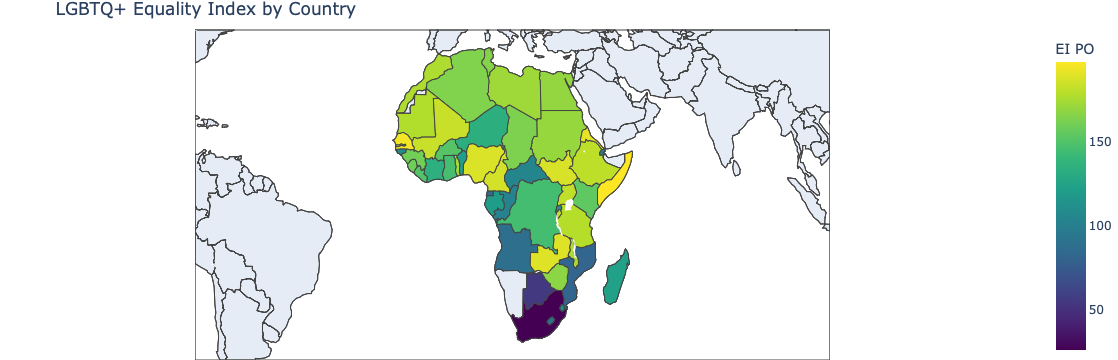

In [195]:
import plotly.express as px

fig = px.choropleth(
    df_africa,
    locations="ISO3",        # This should be ISO Alpha-2 codes
    locationmode="ISO-3",
    color="EI PO",                   # Color by Equality Index
    hover_name="Region ID",            # Show country name on hover
    color_continuous_scale="Viridis",
    projection="natural earth",
    title="LGBTQ+ Equality Index by Country"
)

fig.update_geos(showcountries=True, showcoastlines=True, showland=True, fitbounds="locations")
fig.update_layout(margin={"r":0,"t":30,"l":0,"b":0})

fig.show()

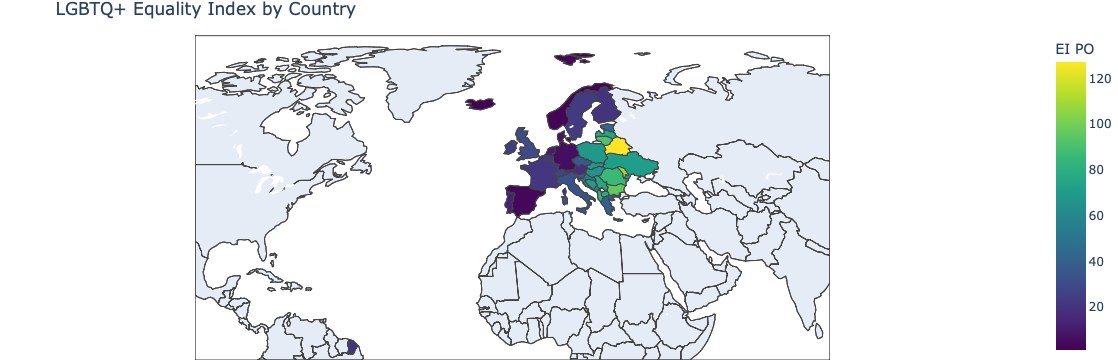

In [197]:
import plotly.express as px

fig = px.choropleth(
    df_europe,
    locations="ISO3",        # This should be ISO Alpha-2 codes
    locationmode="ISO-3",
    color="EI PO",                   # Color by Equality Index
    hover_name="Region ID",            # Show country name on hover
    color_continuous_scale="Viridis",
    projection="natural earth",
    title="LGBTQ+ Equality Index by Country"
)

fig.update_geos(showcountries=True, showcoastlines=True, showland=True, fitbounds="locations")
fig.update_layout(margin={"r":0,"t":30,"l":0,"b":0})

fig.show()

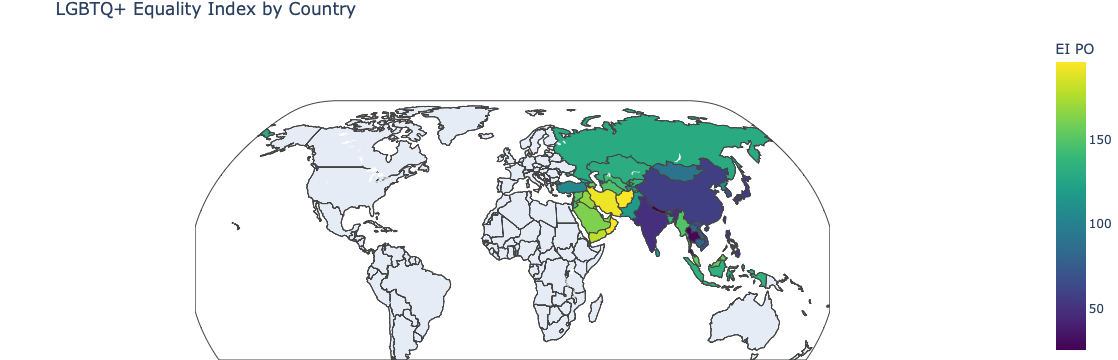

In [198]:
import plotly.express as px

fig = px.choropleth(
    df_asia,
    locations="ISO3",        # This should be ISO Alpha-2 codes
    locationmode="ISO-3",
    color="EI PO",                   # Color by Equality Index
    hover_name="Region ID",            # Show country name on hover
    color_continuous_scale="Viridis",
    projection="natural earth",
    title="LGBTQ+ Equality Index by Country"
)

fig.update_geos(showcountries=True, showcoastlines=True, showland=True, fitbounds="locations")
fig.update_layout(margin={"r":0,"t":30,"l":0,"b":0})

fig.show()

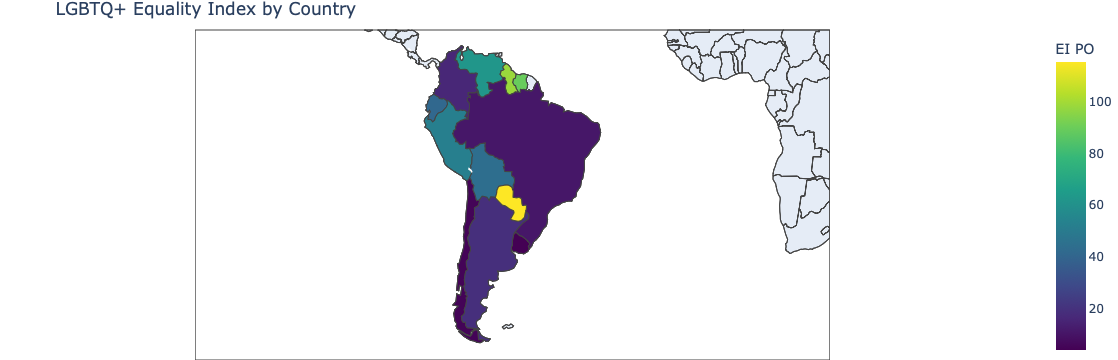

In [201]:
import plotly.express as px

fig = px.choropleth(
    df_south_america,
    locations="ISO3",        # This should be ISO Alpha-2 codes
    locationmode="ISO-3",
    color="EI PO",                   # Color by Equality Index
    hover_name="Region ID",            # Show country name on hover
    color_continuous_scale="Viridis",
    projection="natural earth",
    title="LGBTQ+ Equality Index by Country"
)

fig.update_geos(showcountries=True, showcoastlines=True, showland=True, fitbounds="locations")
fig.update_layout(margin={"r":0,"t":30,"l":0,"b":0})

fig.show()

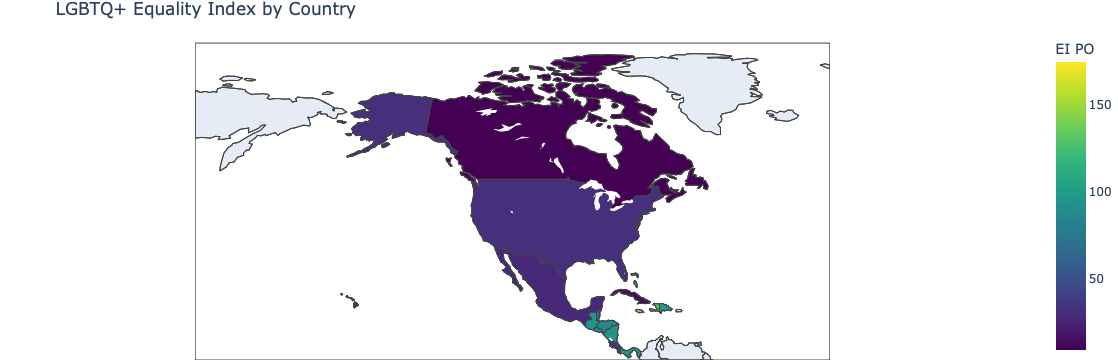

In [203]:
import plotly.express as px

fig = px.choropleth(
    df_north_america,
    locations="ISO3",        # This should be ISO Alpha-2 codes
    locationmode="ISO-3",
    color="EI PO",                   # Color by Equality Index
    hover_name="Region ID",            # Show country name on hover
    color_continuous_scale="Viridis",
    projection="natural earth",
    title="LGBTQ+ Equality Index by Country"
)

fig.update_geos(showcountries=True, showcoastlines=True, showland=True, fitbounds="locations")
fig.update_layout(margin={"r":0,"t":30,"l":0,"b":0})

fig.show()

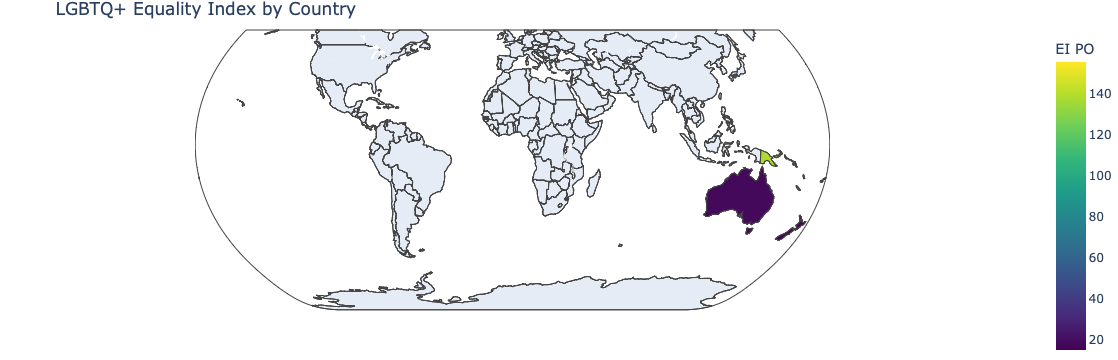

In [205]:
import plotly.express as px

fig = px.choropleth(
    df_oceania,
    locations="ISO3",        # This should be ISO Alpha-2 codes
    locationmode="ISO-3",
    color="EI PO",                   # Color by Equality Index
    hover_name="Region ID",            # Show country name on hover
    color_continuous_scale="Viridis",
    projection="natural earth",
    title="LGBTQ+ Equality Index by Country"
)

fig.update_geos(showcountries=True, showcoastlines=True, showland=True, fitbounds="locations")
fig.update_layout(margin={"r":0,"t":30,"l":0,"b":0})

fig.show()

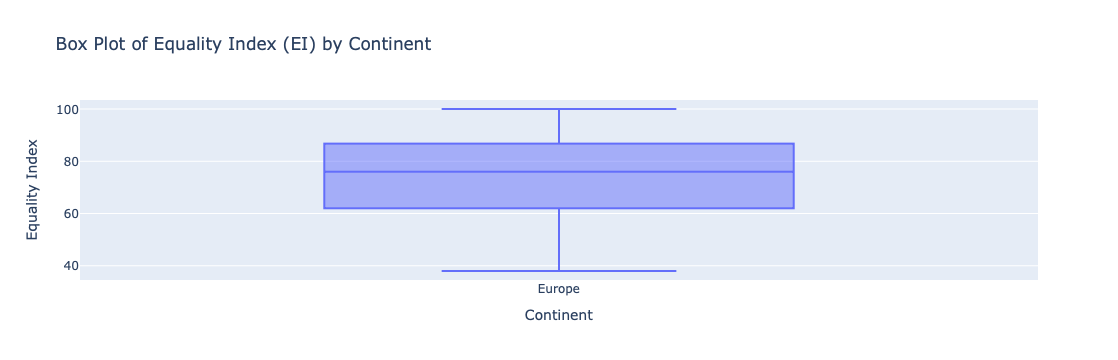

In [206]:
import plotly.express as px

fig = px.box(
    df_europe,
    x='Continent',  # Group by continent
    y='EI',  # The Equality Index
    title="Box Plot of Equality Index (EI) by Continent",
    labels={"EI": "Equality Index", "Continent": "Continent"},  # Optional, for better labeling
)

fig.show()


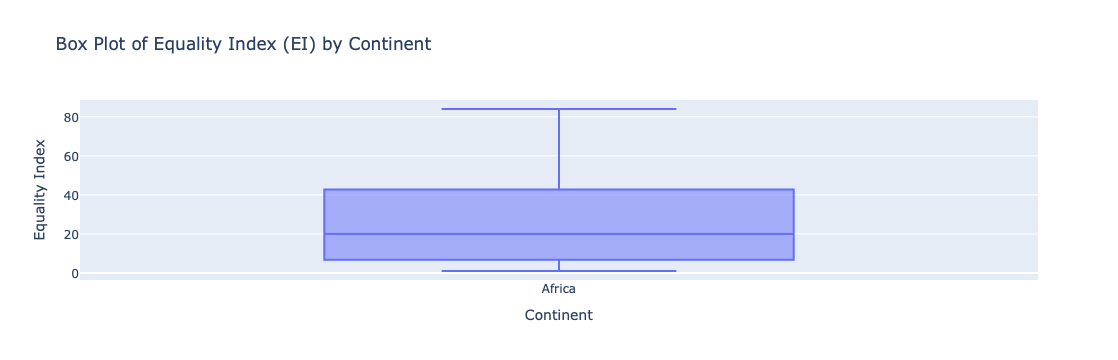

In [208]:
import plotly.express as px

fig = px.box(
    df_africa,
    x='Continent',  # Group by continent
    y='EI',  # The Equality Index
    title="Box Plot of Equality Index (EI) by Continent",
    labels={"EI": "Equality Index", "Continent": "Continent"},  # Optional, for better labeling
)

fig.show()


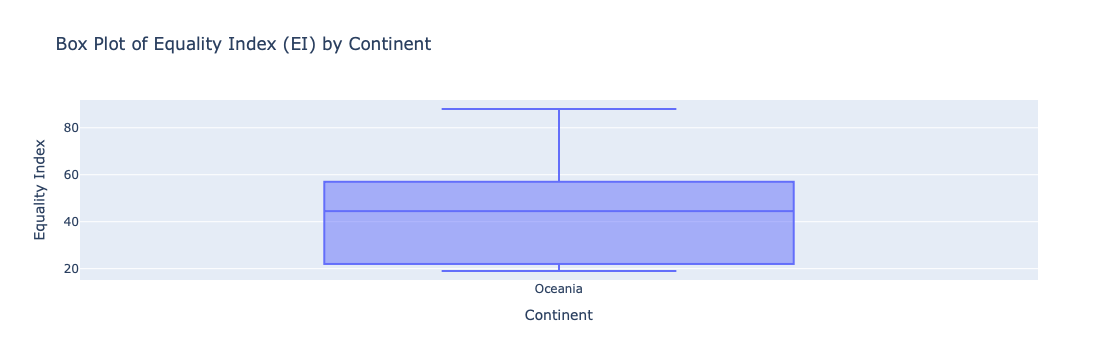

In [211]:
import plotly.express as px

fig = px.box(
    df_oceania,
    x='Continent',  # Group by continent
    y='EI',  # The Equality Index
    title="Box Plot of Equality Index (EI) by Continent",
    labels={"EI": "Equality Index", "Continent": "Continent"},  # Optional, for better labeling
)

fig.show()


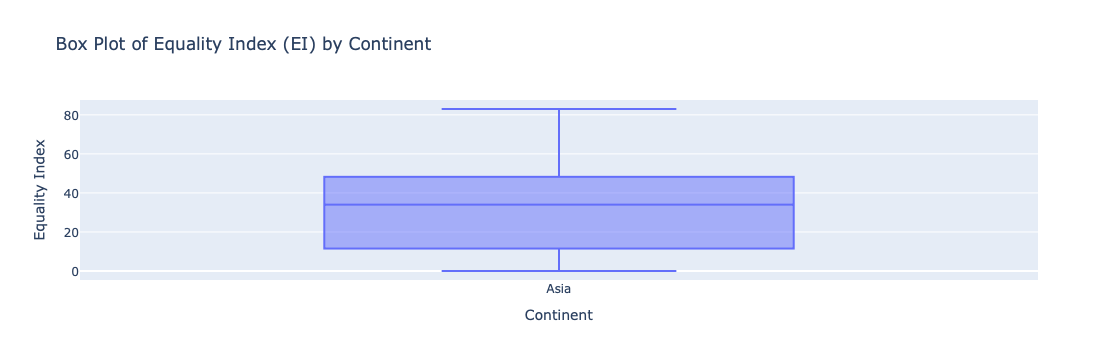

In [213]:
import plotly.express as px

fig = px.box(
    df_asia,
    x='Continent',  # Group by continent
    y='EI',  # The Equality Index
    title="Box Plot of Equality Index (EI) by Continent",
    labels={"EI": "Equality Index", "Continent": "Continent"},  # Optional, for better labeling
)

fig.show()


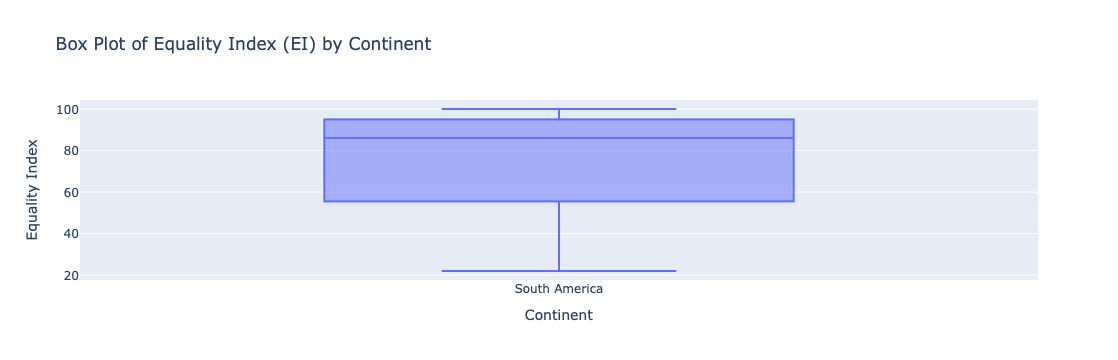

In [215]:
import plotly.express as px

fig = px.box(
    df_south_america,
    x='Continent',  # Group by continent
    y='EI',  # The Equality Index
    title="Box Plot of Equality Index (EI) by Continent",
    labels={"EI": "Equality Index", "Continent": "Continent"},  # Optional, for better labeling
)

fig.show()


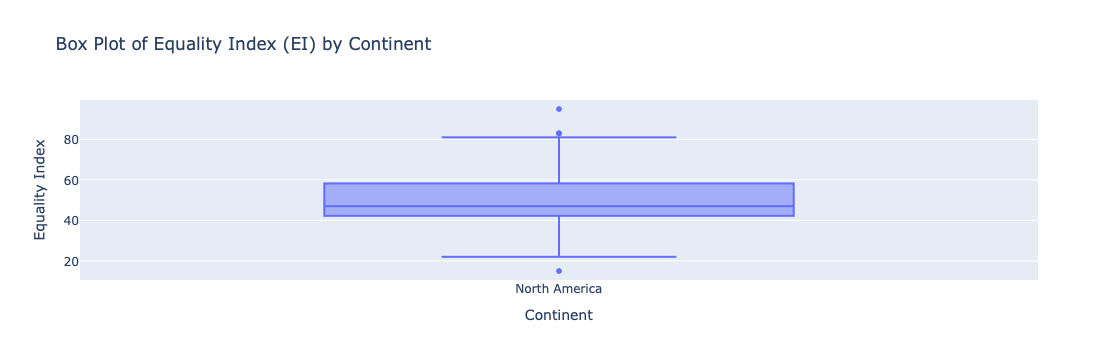

In [217]:
import plotly.express as px

fig = px.box(
    df_north_america,
    x='Continent',  # Group by continent
    y='EI',  # The Equality Index
    title="Box Plot of Equality Index (EI) by Continent",
    labels={"EI": "Equality Index", "Continent": "Continent"},  # Optional, for better labeling
)

fig.show()


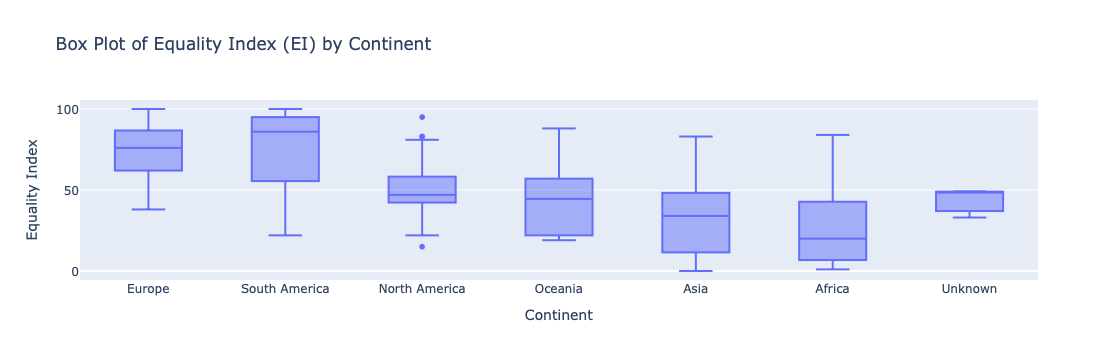

In [219]:
import plotly.express as px

fig = px.box(
    df,
    x='Continent',  # Group by continent
    y='EI',  # The Equality Index
    title="Box Plot of Equality Index (EI) by Continent",
    labels={"EI": "Equality Index", "Continent": "Continent"},  # Optional, for better labeling
)

fig.show()


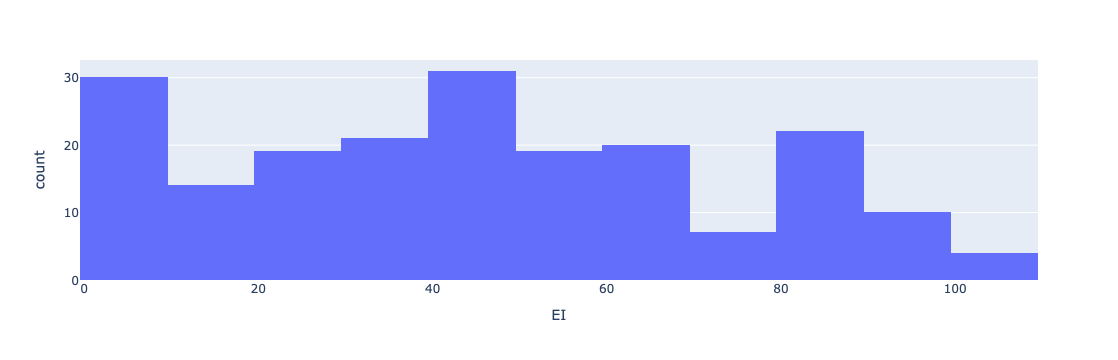

In [221]:
fig = px.histogram(
    df,
    x='EI',
)
fig.show()